# Gráfico de Líneas Doble
Es un gráfico de líneas al cual quiero añadirle una línea adicional que codifique los valores de una nueva variable utilizando un segundo Eje Y con una escala diferente.     
**Eje X**: Variable numérica o variable categórica ordinal (tiempo)  
**Ejes Y de la Izquierda**: Variable numérica  
**Ejes Y de la Derecha**: Variable numérica  
**Otros nombres**: Twin Plot

En el gráfico temperatura del eje derecho, es de color naranja al igual que su línea. El eje de densidad esta a la izquierda y tiene el color azul.

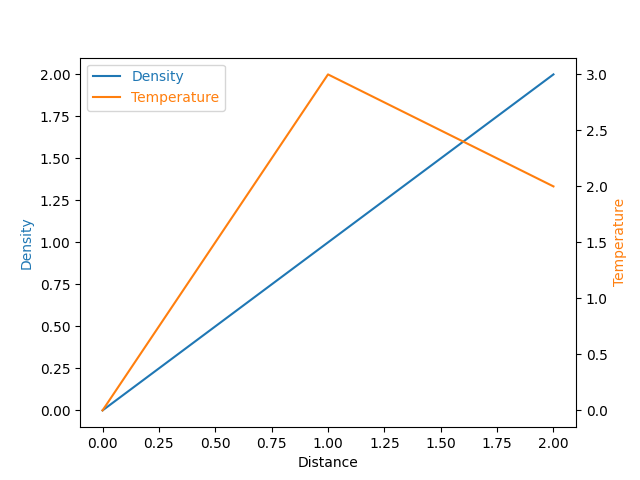

### Cuando utilizar
- Quiero comparar como se relacionan los cambios de magnitud de más de una variable (Ejes Y), regidos por otra variable (Eje X). Es decir, me interesa como interactuan las 3 variables.

### Cuando NO utilizar
- Si no me interesa conocer la interacción de las 3 variables


### Consejos
- Puedo añadir cuantos Ejes Y quiera. Sin embargo, esto aumenta la complejidad del gráfico y eventualmente se vuelve incomprensible.
  - Es indispensable que Cada Eje Y tenga su propio color de acuerdo a la línea
- Es una alternativa más efectiva al Gráfico de Radar. Ya que tengo diferentes escalas, sin comprometer la habilidad de comparar facilmente las variables entre sí y tampoco realizar normalización.


Podemos añadir más de un eje Y, cada eje tiene su gráfico y se escalan proporcionalmente a los demás ejes.

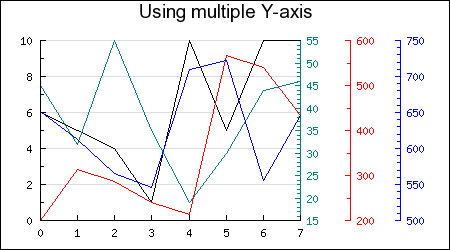


## En esta clase
### Datos
Información sobre paises por año: Expectativa de vida, Población y GDP per Capita
### Objetivos
1. Analizar como cambia la expectativa de vida, y el gdp per capita a través de los años de Asia.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
plt.style.use('bmh')

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/paises_vida.csv', index_col='index')
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [ ]:
# Eliminamos filas NaNs y filtramos continente Asia y agrupamos por año
df = df.dropna()
df_asia = df[df['continent'] == 'Asia'] # solo datos de Asia
df_asia_agrupado = df_asia.groupby('year').agg({
    'lifeExp': np.mean, # agrupa y saca el promedio de la agrupación
    'pop': np.sum,
    'gdpPercap': np.sum
})
df_asia_agrupado

C:\Users\favio\AppData\Local\Temp\ipykernel_19460\3622661576.py:4: FutureWarning: The provided callable <function mean at 0x000002AABFB231A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_asia_agrupado = df_asia.groupby('year').agg({
C:\Users\favio\AppData\Local\Temp\ipykernel_19460\3622661576.py:4: FutureWarning: The provided callable <function sum at 0x000002AABFB21DA0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_asia_agrupado = df_asia.groupby('year').agg({


,lifeExp,pop,gdpPercap
year,,,
1952,46.314394,1395357351,171450.972133
1957,49.318544,1562780599,190995.187018
1962,51.563223,1696357182,189069.197618
1967,54.663640,1905662900,197048.721329
1972,57.319269,2150972248,270186.467082
1977,59.610556,2384513556,257113.362658
1982,62.617939,2610135582,245326.460197
1987,64.851182,2871220762,251071.474755
1992,66.537212,3133292191,285109.778175


<Axes: xlabel='year'>

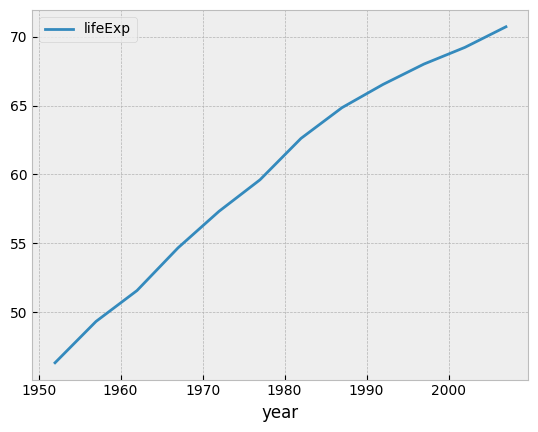

In [4]:
# Empecemos con un grafico de lineas de una sola variable
df_asia_agrupado.plot.line(
    y='lifeExp',
    grid=True
)

<Axes: xlabel='year'>

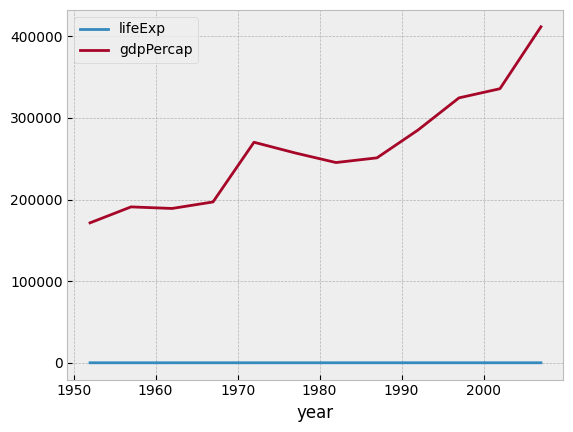

In [ ]:
# Notemos como si graficamos todo en un mismo eje, perdemos noción de la escala
df_asia_agrupado.plot.line(
    y=['lifeExp', 'gdpPercap'],
    grid=True
)
# la expectativa de vida maneja valores mucho menores que el gdpPercap

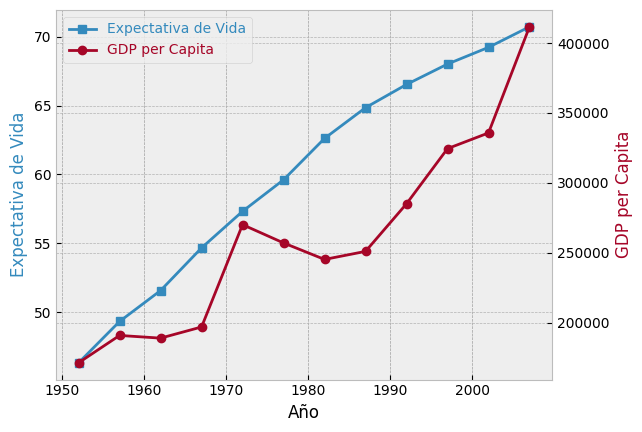

In [13]:
# Grafico de lineas con doble eje Y
# https://matplotlib.org/stable/gallery/axes_grid1/parasite_simple.html#sphx-glr-gallery-axes-grid1-parasite-simple-py
host = host_subplot(111)
par = host.twinx()

host.set_xlabel("Año")
host.set_ylabel("Expectativa de Vida")
par.set_ylabel("GDP per Capita")

p1, = host.plot(
    df_asia_agrupado.index.values, 
    df_asia_agrupado['lifeExp'], 
    label="Expectativa de Vida",
    marker='s'
)

p2, = par.plot(
    df_asia_agrupado.index.values, 
    df_asia_agrupado['gdpPercap'], 
    label="GDP per Capita",
    marker='o'
)

# Para mapear las lineas a los colores
host.legend(labelcolor="linecolor")
host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

plt.grid(True)
plt.show()

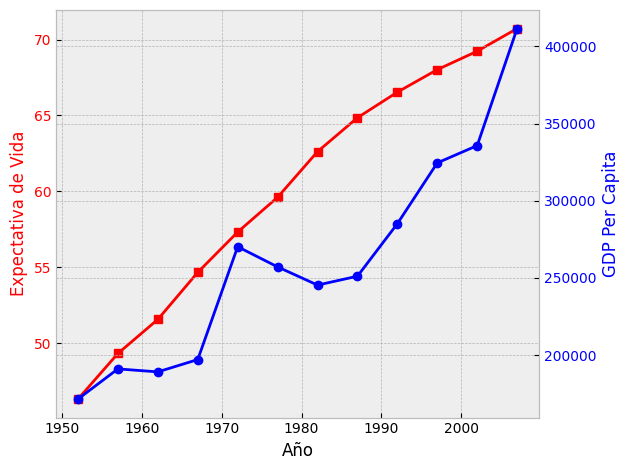

In [ ]:
# Metodo antiguo en Matplotlib
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py
fig, ax1 = plt.subplots()

ax1.set_xlabel('Año')
ax1.set_ylabel('Expectativa de Vida', color='red') # crea una etiqueta en el eje Y
ax1.plot(    
    df_asia_agrupado.index.values, # eje X
    df_asia_agrupado['lifeExp'],   # eje Y
    color='red',
    marker='s' # marcador en forma de cuadrado
)
ax1.tick_params(axis='y', labelcolor='red') # pintamos el eje Y de la izquierda

ax2 = ax1.twinx() # jemelo al eje ax1

ax2.set_ylabel('GDP Per Capita', color='blue')  # crea una etiqueta en el eje Y
ax2.plot(
    df_asia_agrupado.index.values, 
    df_asia_agrupado['gdpPercap'], 
    color='blue',
    marker='o' # marcador en forma de circulo
)
ax2.tick_params(axis='y', labelcolor='blue') # pintamos el eje Y de la derecha

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
# ambos aumenta a lo largo del tiempo